In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
with open("2023-06-26_rawData.csv", "r") as f:
    data = f.readlines()

In [11]:
meas = []
anal = []
anal_group = []
marker = []
last_time = 0
last_anal = 0
for line in data:
    row = line.strip().split(";")
    if "arker" in line:
        marker.append({"ticks": last_time, "name": line.strip(), "value": 1})
        #if "Testmarker6" in line.strip():
        #    meas = []
        #    anal = []
        #if "Testmarker7" in line.strip():
        #    break
    elif len(row) <= 1:
        pass
    elif "marker" in row[0]:
        print(row)
    elif row[1] == "meas":
        if "ticks" not in line:
            try:
                temp = [int(_) for _ in row[2:-1]]

                magni = math.sqrt(temp[4]**2 + temp[5]**2 + temp[6]**2)
                phi = math.atan2(temp[5], temp[4])
                theta = math.acos(temp[6]/ magni)
                meas.append({
                    "ticks": temp[0],
                    "x": temp[4],
                    "y": temp[5],
                    "z": temp[6],
                    "magni": magni,
                    "phi": phi,
                    "theta": theta,
                    "vib": temp[8]
                })
                last_time = temp[0]
            except ValueError:
                pass
    elif row[1] == "anal":
        anal.append(row[2:])
    else:
        if row[1] == "reboot":
            meas = []
            anal = []
    if last_time - last_anal > 100:
        anal_group.append({"grp": meas[-128:]})
        last_anal = last_time

In [12]:
anal_values = []
for grp in anal_group:
    if len(grp["grp"]) >= 1:
        anal_values.append(dict(pd.DataFrame(grp["grp"]).mean()))

In [13]:
anal_values

[{'ticks': 283756.0,
  'x': 780.0,
  'y': -156.0,
  'z': 10920.0,
  'magni': 10948.93309870875,
  'phi': -0.19739555984988075,
  'theta': 0.07271470633943475,
  'vib': 0.0},
 {'ticks': 283807.55,
  'x': 799.5,
  'y': -74.1,
  'z': 10065.9,
  'magni': 10099.508644937227,
  'phi': -0.09046674439143212,
  'theta': 0.08093513676339861,
  'vib': 0.0},
 {'ticks': 283860.7368421053,
  'x': 800.5263157894736,
  'y': -63.63157894736842,
  'z': 10020.947368421053,
  'magni': 10054.359115308698,
  'phi': -0.07811186276057344,
  'theta': 0.08090216877328245,
  'vib': 0.0},
 {'ticks': 283911.14285714284,
  'x': 805.0714285714286,
  'y': -54.32142857142857,
  'z': 9996.535714285714,
  'magni': 10030.153751862277,
  'phi': -0.06616384595191939,
  'theta': 0.08130354280794996,
  'vib': 0.0},
 {'ticks': 283962.5540540541,
  'x': 798.972972972973,
  'y': -51.648648648648646,
  'z': 9992.432432432432,
  'magni': 10025.516549197935,
  'phi': -0.061877707065537614,
  'theta': 0.08062085393347336,
  'vib': 

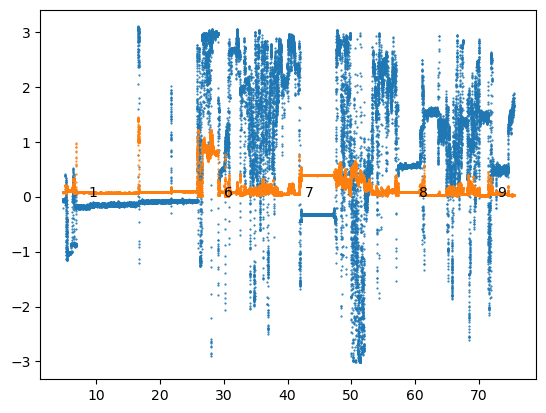

In [21]:
#;meas;ticks;xH;yH;zH;xL;yL;zL;magni;temp;vibr;
pd_marker = pd.DataFrame(marker)
#pd_d = pd.DataFrame(meas)
pd_anal = pd.DataFrame(anal_values)

t_start = 0 * 60000#700000
t_end = 90 * 60000 #800000
pd_anal = pd_anal.loc[pd_anal["ticks"] > t_start]
pd_anal = pd_anal.loc[pd_anal["ticks"] < t_end]

fig, ax = plt.subplots()

#pd_anal["magni"] = (pd_d["x"]**2 + pd_d["y"]**2 + pd_d["z"]**2)**0.5

#plt.plot(pd_d["ticks"], pd_d["x"])
#plt.plot(pd_d["ticks"], pd_d["y"])

#plt.scatter(pd_anal["ticks"] / 60000, pd_anal["magni"], s=0.3)
plt.scatter(pd_anal["ticks"] / 60000, pd_anal["phi"], s=0.3)
plt.scatter(pd_anal["ticks"] / 60000, pd_anal["theta"], s=0.3)


#plt.scatter(pd_anal["ticks"] / 60000, pd_anal["magni"], s=1)
#plt.scatter(pd_anal["ticks"] / 60000, pd_anal["vib"] * 3, s=0.3)


for i in marker:
    if i["ticks"] < t_end and i["ticks"] > t_start:
        plt.text(i["ticks"] / 60000, 0, i["name"][-1], c="black")

In [22]:
pd_anal.to_csv("2023-06-30_out.csv")